In [3]:
#https://www.youtube.com/watch?v=k_VAKyzggJI
import nltk
import inflect
import contractions
from bs4 import BeautifulSoup
import re, string, unicodedata
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation
import re
import numpy as np
from collections import Counter
from nltk import ngrams
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ardel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
import re
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math
import nltk

In [10]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ardel\AppData\Roaming\nltk_data...


True

In [5]:
df = pd.read_csv("data_clean.csv")
df

,text,label
0,As more patients choose dental implants as the...,0
1,Diabetes mellitus (DM) is a recognized risk fa...,0
2,Risk factors associated with tooth loss have b...,0
3,To retrospectively assess clinical and radiogr...,0
4,Periodontal disease often develops in patients...,0
...,...,...
583,The journey of gastric phytobezoar followed by...,1
584,Determinants of protein-energy malnutrition in...,1
585,Prosthetic rehabilitation of an edentulous pat...,1
586,T-bar clasp-retained removable partial denture...,1


In [6]:
def cleansing(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'/(?<!\S).(?!\S)\s*/', '', text)
    return text

In [7]:
df['text'] = df['text'].apply(cleansing)
df.head()

,text,label
0,as more patients choose dental implants as the...,0
1,diabetes mellitus dm is a recognized risk fact...,0
2,risk factors associated with tooth loss have b...,0
3,to retrospectively assess clinical and radiogr...,0
4,periodontal disease often develops in patients...,0


In [8]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df

,text,label
0,patients choose dental implants primary treatm...,0
1,diabetes mellitus dm recognized risk factor de...,0
2,risk factors associated tooth loss studied how...,0
3,retrospectively assess clinical radiographic o...,0
4,periodontal disease often develops patients di...,0
...,...,...
583,journey gastric phytobezoar followed tomography,1
584,determinants proteinenergy malnutrition commun...,1
585,prosthetic rehabilitation edentulous patient c...,1
586,tbar claspretained removable partial denture a...,1


In [11]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    st = ""
    for w in w_tokenizer.tokenize(text):
        st = st + lemmatizer.lemmatize(w) + " "
    return st
df['text'] = df.text.apply(lemmatize_text)
df

,text,label
0,patient choose dental implant primary treatmen...,0
1,diabetes mellitus dm recognized risk factor de...,0
2,risk factor associated tooth loss studied howe...,0
3,retrospectively ass clinical radiographic outc...,0
4,periodontal disease often develops patient dia...,0
...,...,...
583,journey gastric phytobezoar followed tomography,1
584,determinant proteinenergy malnutrition communi...,1
585,prosthetic rehabilitation edentulous patient c...,1
586,tbar claspretained removable partial denture a...,1


In [12]:
def perform_oversampling(df):
    df_non = df[df['label'] == 1]
    df_exclude = df[df['label'] == 0]
    df_low_oversampled = df_exclude.sample(df_non.shape[0], replace=True)
    return pd.concat([df_low_oversampled, df_non], axis=0)

print('Original data:')
print(df['label'].value_counts())

df = perform_oversampling(df)

print('-'*10)
print('After oversampling:')
print(df['label'].value_counts())

Original data:
0    540
1     48
Name: label, dtype: int64
----------
After oversampling:
0    48
1    48
Name: label, dtype: int64


In [13]:
text = df['text'].values
labels = df['label'].values
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

In [15]:
# train_sentences, test_sentences, train_labels, test_labels = train_test_split(text, encoded_labels, stratify = encoded_labels)

x_train, x_test, y_train, y_test = train_test_split(text, encoded_labels, stratify = encoded_labels)

In [16]:

vocab_size = 3000 
oov_tok = ''
embedding_dim = 100
max_length = 200
padding_type='post'
trunc_type='post'


tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(x_train)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)

test_sequences = tokenizer.texts_to_sequences(x_test)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

In [17]:

model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          300000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              84480     
 l)                                                              
                                                                 
 dense (Dense)               (None, 24)                3096      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 387,601
Trainable params: 387,601
Non-trainable params: 0
_________________________________________________________________


In [22]:
num_epochs = 12
history = model.fit(train_padded, y_train, 
                    epochs=num_epochs, verbose=1, 
                    validation_split=0.1)

prediction = model.predict(test_padded)
# Get labels based on probability 1 if p>= 0.5 else 0
pred_labels = []
for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
print("acc of test set", accuracy_score(y_test,pred_labels))

Epoch 1/12
2/2 [==============================] - 0s 150ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.9421 - val_accuracy: 0.7500
Epoch 2/12
2/2 [==============================] - 0s 133ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.9618 - val_accuracy: 0.7500
Epoch 3/12
2/2 [==============================] - 0s 141ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.9787 - val_accuracy: 0.7500
Epoch 4/12
2/2 [==============================] - 0s 141ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.9982 - val_accuracy: 0.7500
Epoch 5/12
2/2 [==============================] - 0s 140ms/step - loss: 9.6034e-04 - accuracy: 1.0000 - val_loss: 1.0221 - val_accuracy: 0.8750
Epoch 6/12
2/2 [==============================] - 0s 126ms/step - loss: 9.2287e-04 - accuracy: 1.0000 - val_loss: 1.0488 - val_accuracy: 0.8750
Epoch 7/12
2/2 [==============================] - 0s 128ms/step - loss: 8.4712e-04 - accuracy: 1.0000 - val_loss: 1.0757 - val_accuracy: 0.8750
Epoch 8/

In [34]:
from keras.models import load_model
    
model.save('lstm-final') 

INFO:tensorflow:Assets written to: lstm-final\assets


INFO:tensorflow:Assets written to: lstm-final\assets


In [23]:
y_predict = np.where(model.predict(test_padded)> 0.5,1,0)
print(classification_report(y_test, y_predict))

1/1 [==============================] - 0s 32ms/step
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.86      1.00      0.92        12

    accuracy                           0.92        24
   macro avg       0.93      0.92      0.92        24
weighted avg       0.93      0.92      0.92        24



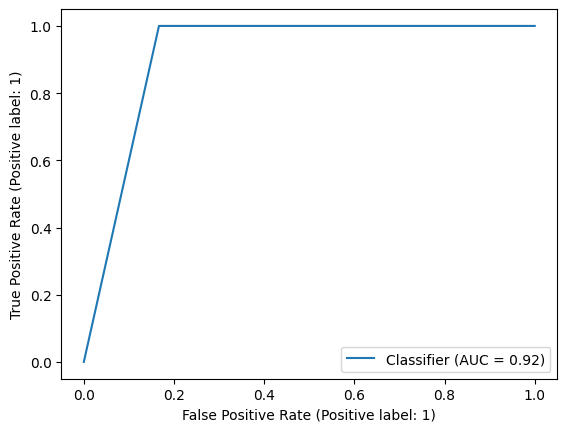

In [29]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_predict)

In [25]:
model.save("lstm-final")

INFO:tensorflow:Assets written to: lstm-final\assets


INFO:tensorflow:Assets written to: lstm-final\assets


In [26]:
model = keras.models.load_model('lstm-final')

In [ ]:
model_3 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  ## After TensorFlow 2.7.0 ## 
  tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons with input_shape defined (None, 1) = look at 1 sample at a time
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit our model to the data
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), # <- expand dimension on final axis 
            y_reg_train, 
            epochs=5)